In [20]:
function Pendulum_ODE!(du, u, p, t)

    g, m1, m2, l1, l2 = p

    du[1] = u[3]
    du[2] = u[4]
    du[3] = ( -g*(2*m1 + m2)*sin(u[1]) - m2*g*sin(u[1]-2*u[2]) - 2*sin(u[1] - u[2]) * m2 * (u[4]^2 * l2 + u[3]^2 * l1 * cos(u[1] - u[2])) ) / ( l1*(2*m1 + m2 - m2*cos(2*u[1] - 2*u[2])) )
    du[4] = ( 2*sin(u[1]-u[2]) * (u[3]^2 * l1 * (m1 + m2)) + g*(m1+m2) * cos(u[1]) + u[4]^2 * l2 * m2 * cos(u[1]-u[2]) ) / (l2 * (2*m1 + m2 - m2*cos(2*u[1] - 2*u[2])))

    nothing
end

Pendulum_ODE! (generic function with 1 method)

In [29]:
using DifferentialEquations, Plots


g = 9.81; m1 = 1.; m2 = 0.5; l1 = 1.; l2 = 0.5
u0 = [1/4*pi, -1/8*pi, 0., 0.]
tspan = (0., 5.)
p = (g, m1, m2, l1, l2)

prob = ODEProblem(Pendulum_ODE!, u0, tspan, p, saveat=0.01);

In [30]:
sol = solve(prob);

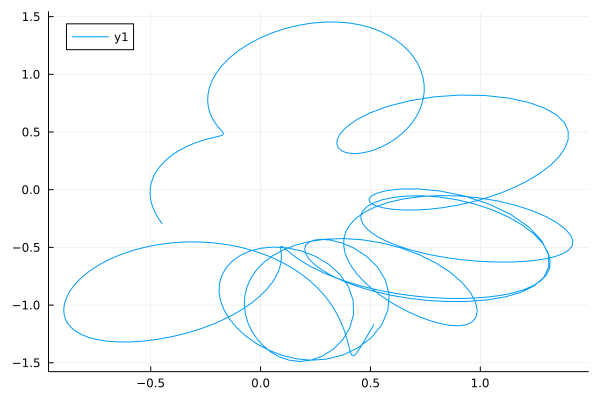

In [55]:
x1 = @. l1*sin(sol[1, :])
y1 = @. -l1*cos(sol[1, :])
x2 = @. x1 + l2*sin(sol[2, :])
y2 = @. y1 - l2*cos(sol[2, :])

plot(x2, y2)